## Bitcoin
### Bitcoin Historical Data


### Link
https://www.kaggle.com/mczielinski/bitcoin-historical-data

# Importando Módulos / Download Dados

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.dates as mdates
import matplotlib as mpl
import kaggle
import os

In [5]:
def downloadKaggle(fName, pathFile,kaggleFile):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(fName, path=pathFile, unzip=True)
    dirname = os.path.abspath('')
    arquivo=dirname + '/../datasets/'+kaggleFile
    return arquivo

arquivo = downloadKaggle('mczielinski/bitcoin-historical-data','../datasets','bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

# Análise Exploratória

In [3]:

df=pd.read_csv(arquivo,sep=',')
df.dropna(inplace=True)

df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [6]:
#df['date'] = pd.to_datetime(df['Timestamp'], format="%m/%d/%Y %I:%M:%S %p")

df['date'] = pd.to_datetime(df['Timestamp'], dayfirst=True, unit='s')

df.set_index('date')

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
date,,,,,,,,
2011-12-31 07:52:00,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31 15:50:00,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2011-12-31 16:59:00,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
2011-12-31 17:00:00,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
2012-01-01 04:16:00,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
2021-03-30 23:56:00,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496


In [7]:
#ent1 = np.datetime64(df['date'][-1:].astype('object'), 'Y')
ent2 = np.timedelta64(1, 'Y')
#entity = np.datetime64(df['date'][-1:], 'Y') + np.timedelta64(1, 'Y')
#print(type(ent1))
print(type(1))
print(df['date'].iloc[-1])
#print(entity)
#print( np.datetime64(df['date'][-1], 'Y') )

#plot_df(df, x=df.index, y=df.Weighted_Price, title='BITCOIN.')    

<class 'int'>
2021-03-31 00:00:00


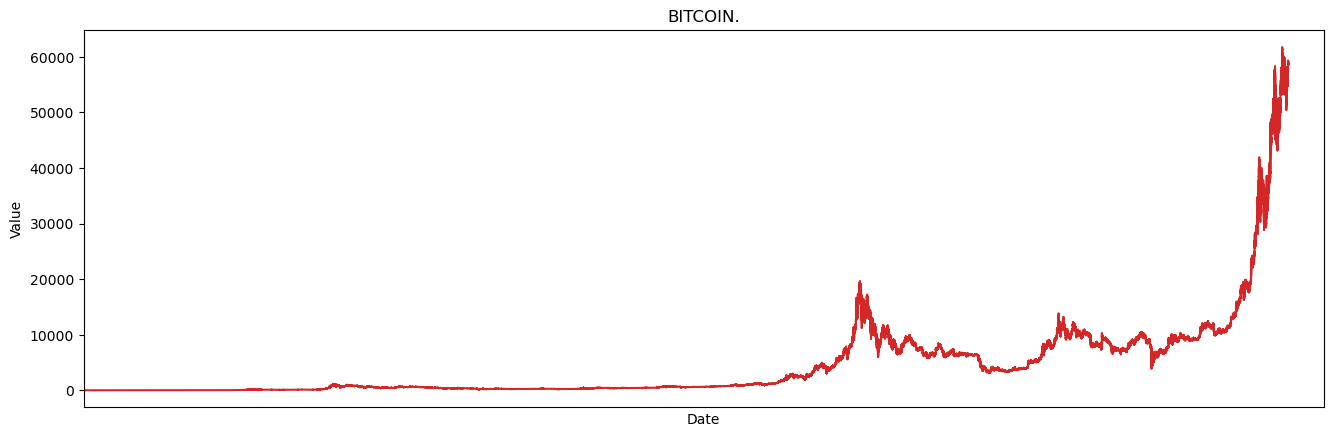

In [8]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    
    #plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    #plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))

    ax = plt.gca()

    # Major ticks every 6 months.
    fmt_half_year = mdates.MonthLocator(interval=6)
    ax.xaxis.set_major_locator(fmt_half_year)

    # Minor ticks every month.
    fmt_month = mdates.MonthLocator()
    ax.xaxis.set_minor_locator(fmt_month)

    # Text in the x axis will be displayed in 'YYYY-mm' format.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # Round to nearest years.
    datemin = np.datetime64(df['date'][0], 'Y')
    datemax = np.datetime64(df['date'].iloc[-1], 'Y') + np.timedelta64(1, 'Y')
    #ax.set_xlim(datemin, datemax)

    # Format the coords message box, i.e. the numbers displayed as the cursor moves
    # across the axes within the interactive GUI.
    ax.format_xdata = mdates.DateFormatter('%Y-%m')
    ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
    #plt.gca().autofmt_xdate()

    plt.gca().set(title=title, xlim=(0, 5000000), xlabel=xlabel, ylabel=ylabel)
    
    plt.show()

plot_df(df, x=df.index, y=df.Open, title='BITCOIN.')    

##########################
3.1
4.58
      Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0    1325317920  4.39  4.39  4.39   4.39      0.455581           2.000000   
478  1325346600  4.39  4.39  4.39   4.39     48.000000         210.720000   
547  1325350740  4.50  4.57  4.50   4.57     37.862297         171.380338   
548  1325350800  4.58  4.58  4.58   4.58      9.000000          41.220000   

     Weighted_Price                date  year month  value  
0          4.390000 2011-12-31 07:52:00  2011   Dec   4.39  
478        4.390000 2011-12-31 15:50:00  2011   Dec   4.39  
547        4.526411 2011-12-31 16:59:00  2011   Dec   4.50  
548        4.580000 2011-12-31 17:00:00  2011   Dec   4.58  
##########################


Text(0.5, 1.0, 'Seasonal Plot of BitCoin')

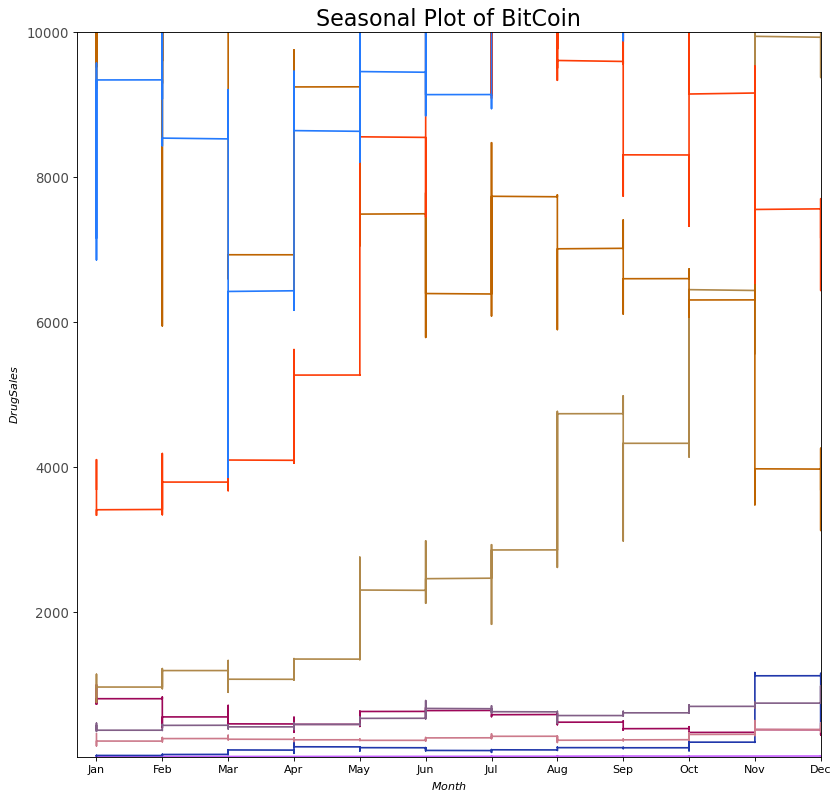

In [9]:
# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

df['value'] = df['Open']

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

#df.loc[df.year==2011, 'value']

#df.loc[df.year==2011]
print("##########################")
print(df.loc[df.year==2011, :].shape[0]-.9)
print(df.loc[df.year==2011, 'value'][-1:].values[0])
print(df.loc[df.year==2011, :])
print("##########################")
# Draw Plot
plt.figure(figsize=(12,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
#        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=5, color=mycolors[i])
#plt.plot('month', 'value', data=df.loc[df.year==2012, :], color=mycolors[0], label=2012)
#plt.plot('month', 'value', data=df.loc[df.year==2011, :], color=mycolors[1], label=2011)
#plt.plot('month', 'value', data=df.loc[df.year==2013, :], color=mycolors[2], label=2013)
#plt.plot('month', 'value', data=df.loc[df.year==2014, :], color=mycolors[3], label=2014)
#plt.plot('month', 'value', data=df.loc[df.year==2015, :], color=mycolors[3], label=2015)
#plt.plot('month', 'value', data=df.loc[df.year==2016, :], color=mycolors[3], label=2016)
#plt.plot('month', 'value', data=df.loc[df.year==2017, :], color=mycolors[3], label=2017)
#plt.plot('month', 'value', data=df.loc[df.year==2017, :], color=mycolors[3], label=2017)
#plt.text(df.loc[df.year==2011, :].shape[0]-.9, df.loc[df.year==2011, 'value'][-1:].values[0], 2011, fontsize=12, color=mycolors[0])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 10000), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of BitCoin", fontsize=20)
#plt.show()